## GMM (Gaussian Matrix Model) for Anomaly detection with python

- GMM
- model is a probabilistic approach for anomaly detection based on the idea that the datafollows a multivariate normal distribution.

- Steps
  1. Model the data with a Gaussian distribution
  2. Compute the Mahalanobis distance
  3. Set a threshold

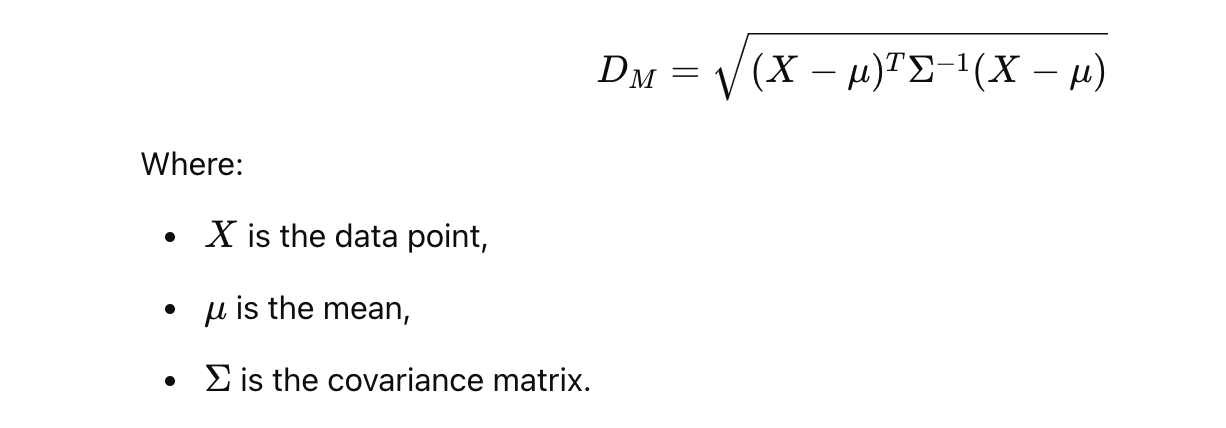

In [1]:
# libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.datasets import make_blobs

In [2]:
# Generate the data
X, _ = make_blobs(n_samples=200,centers = [[2,2]], cluster_std=.5, random_state=42)
anomalies = np.array([[8,8], [9,9], [10,10],[7,7],[6,6]])
X_with_anomalies = np.vstack([X, anomalies])

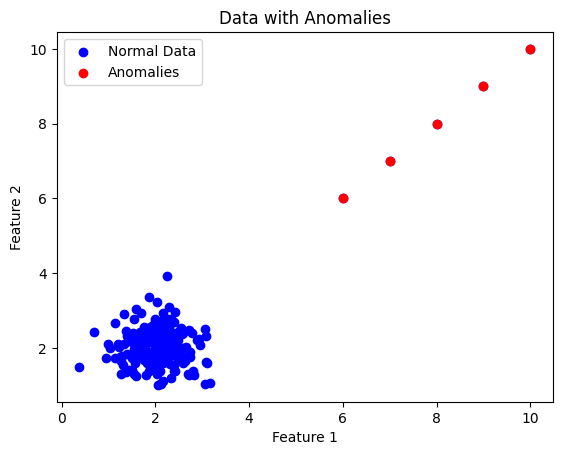

In [3]:
# Visualize the data
plt.scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1], c='blue', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')
plt.title('Data with Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
# Calculate the mean and covariance 
mean = np.mean(X, axis = 0)
cov_matrix = np.cov(X.T)

# Inverse the covariance matrix

inv_cov_matrix = np.linalg.inv(cov_matrix)

In [5]:
# Function to calculate the mahalanobis distance 

def mahalanobis_distance(x, mean, inv_cov):
    return mahalanobis(x, mean, inv_cov)

In [6]:
# Compute distance for each point in the dataset,
distances = np.array([mahalanobis_distance(x, mean, inv_cov_matrix) for x in X_with_anomalies])

# Threshold 

threshold = np.percentile(distances, 95)
# threshold = np.percentile(distances, 95)
anomalies_detected = X_with_anomalies[distances> threshold]

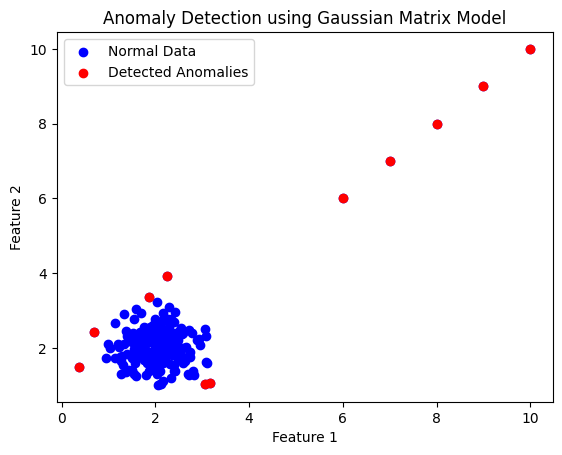

In [7]:
# Visualize anomalies
plt.scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1], c='blue', label='Normal Data')
plt.scatter(anomalies_detected[:, 0], anomalies_detected[:, 1], c='red', label='Detected Anomalies')
plt.title('Anomaly Detection using Gaussian Matrix Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()